## Lead Score using Logistic Regression

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\parri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1:  Data Understanding and Inspection

In [2]:
# Reading dataset and inspecting various variables.
lead = pd.read_csv('Leads.csv')
print(lead.shape)
lead.head()

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting the variable datatypes
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,1a2e1831-defc-4574-bbe0-c3d809972ee9,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


**A few observations:**

--> We can see that the important data variables are of categorical type. A few continuous variables like 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website' are also present.

--> There's a lot of missing values in the dataset.

--> An unnecessary entry called 'Select' can be seen.

### Step 2: Data Cleaning

In [5]:
# Checking for duplicates and null values
print(sum(lead.duplicated(subset = 'Lead Number')))

0


In [6]:
# Looking at the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Columns 'Prospect ID' and 'Lead Number' consist of all unique values. These can be dropped.

'Lead Quality' has very high number of missing values. 

Also, there are some scores and indices columns whose values are decided by the Sales team and is not provided by the dataset itself. So, it's better to drop these.


In [7]:
# Dropping columns that are not useful for the model 
lead = lead.drop(columns=['Prospect ID', 'Lead Number', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

# Looking at the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# Converting all 'Select' values to NAN.
lead = lead.replace('Select', np.nan)

In [9]:
# Looking at the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
# Dropping column 'How did you hear about X Education' with high missing values
lead = lead.drop(['How did you hear about X Education'], axis=1)

In [11]:
# Let's look at the columns with significant number of missing values
# 'Country' with 26% missing values. 
lead.Country.value_counts()/lead.Country.value_counts().sum() * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Kuwait                   0.059006
Canada                   0.059006
Germany                  0.059006
Nigeria                  0.059006
South Africa             0.059006
Sweden                   0.044254
Uganda                   0.029503
Italy                    0.029503
China                    0.029503
Netherlands              0.029503
Belgium                  0.029503
Ghana                    0.029503
Philippines              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Denmark                  0.014751
Tanzania      

As we can see that the column 'Country' is highly skewed. The big majority of the distributed data belongs to the 'India' category. So, we need to drop this column.

In [12]:
# Drop 'Country' column
lead = lead.drop(['Country'], axis=1)

In [13]:
# 'Specialization' with 36% missing values. 
lead.Specialization.value_counts()/lead.Specialization.value_counts().sum() * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

Imputing this categorical column using mode is not suitable here as there are 36% missing values and the top 3 category percentages are very close to each Other. So, let's create another category 'other' to represent these missing values.

In [14]:
lead.Specialization.fillna("Other", inplace = True)
lead.Specialization.value_counts()/lead.Specialization.value_counts().sum() * 100

Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [15]:
# 'What is your current occupation' with 29% missing values
lead['What is your current occupation'].value_counts()/lead['What is your current occupation'].value_counts().sum() * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Highest percentage category is 'Unemployed' with 85%. So, it's most likely that the missing values are 'Unemployed'. This will not be very useful for modelling. Let's drop this column. 

In [16]:
# Drop 'What is your current occupation' column
lead = lead.drop(['What is your current occupation'], axis=1)

In [17]:
# 'What matters most to you in choosing a course' with 29% missing values
lead['What matters most to you in choosing a course'].value_counts()/lead['What matters most to you in choosing a course'].value_counts().sum() * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Clearly, this column is highly skewed and dropping it is the necessary.

In [18]:
# Drop 'What matters most to you in choosing a course' column
lead = lead.drop(['What matters most to you in choosing a course'], axis=1)

In [19]:
# Tags with 36% missing values
lead.Tags.value_counts()/lead.Tags.value_counts().sum() * 100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In the column 'Tags' there are a lot of categories with low percentages. Most values are from the first two categories and others are missing values. 

So, let's make a new category 'Other', representing all the less significant categories and missing values.

In [20]:
# Creating two new categories 'Other' and 'Unknown' for column 'Tags'
lead.Tags = lead.Tags.replace(['Lost to EINS',
 'In confusion whether part time or DLP',
 'Busy',
 'in touch with EINS',
 'Diploma holder (Not Eligible)',
 'Graduation in progress',
 'number not provided',
 'opp hangup',
 'Not doing further education',
 'invalid number',
 'wrong number given',
 'Interested  in full time MBA',
 'Still Thinking',
 'Lost to Others',
 'Shall take in the next coming month',
 'Lateral student',
 'Interested in Next batch',
 'Recognition issue (DEC approval)',
 'Want to take admission but has financial problems',
 'University not recognized'], 'Other')
lead.Tags.fillna("Other", inplace = True)
lead.Tags.value_counts()/lead.Tags.value_counts().sum() * 100

Other                                  47.500000
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Name: Tags, dtype: float64

In [21]:
# City with 39% missing values
lead.City.value_counts()/lead.City.value_counts().sum() * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

There are around 39% missing values and Mumbai leads the categorical count with 58% of the column values. If we can impute these values with the mode of this column which is 'Mumbai' itself, it will make the column skewed. So let's categorize these values as 'Unknown'.

In [22]:
# Imputing the missing values with 'Mumbai'
lead.City.fillna('Unknown',inplace = True)
lead.City.value_counts()/lead.City.value_counts().sum() * 100

Unknown                        39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [23]:
# Creating a category 'Other_cities' for column 'City'
#lead.City = lead.City.replace(['Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'], 'Other')
#lead.City.value_counts()/lead.City.value_counts().sum() * 100

The remaining columns have very small percentage(~1%) of missing values. We could either impute it with the column's mode/median or just drop it as it wouldn't make much difference to the dataset.

Let's drop the missing values.

In [24]:
# Dropping remaining % of missing values
lead.dropna(inplace = True)

In [25]:
# Looking at the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [26]:
# 'Lead Source' 
lead['Lead Source'].value_counts()/lead['Lead Source'].value_counts().sum() * 100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
blog                  0.011020
WeLearn               0.011020
NC_EDM                0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
testone               0.011020
Pay per Click Ads     0.011020
Name: Lead Source, dtype: float64

There is another category 'google' which is same as 'Google', let's change it to later.

Also, there are a lot of categories with very low percentages. Let's create a common category 'Other' for these.

In [27]:
# Creating a common category 'Other' for various categories
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace([
 'Referral Sites',
 'Welingak Website',
 'Reference',
 'Facebook',
 'blog',
 'Pay per Click Ads',
 'bing',
 'Social Media',
 'WeLearn',
 'Click2call',
 'Live Chat',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'Press_Release',
 'NC_EDM'], 'Other')
lead['Lead Source'].value_counts()/lead['Lead Source'].value_counts().sum() * 100

Google            31.661891
Direct Traffic    28.025127
Olark Chat        19.318933
Organic Search    12.717655
Other              8.276394
Name: Lead Source, dtype: float64

In [28]:
# 'Last Activity'
lead['Last Activity'].value_counts()/lead['Last Activity'].value_counts().sum() * 100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In this column there are many small percentages of category values. Let's club them into a single category 'Other'.

In [29]:
# Creating a common category 'Other' for various categories
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed', 'Had a Phone Conversation',
 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other')
lead['Last Activity'].value_counts()/lead['Last Activity'].value_counts().sum() * 100

Email Opened               37.822350
SMS Sent                   29.931673
Olark Chat Conversation    10.711924
Other                       9.764161
Page Visited on Website     7.053119
Converted to Lead           4.716773
Name: Last Activity, dtype: float64

In [30]:
# let's look at outliers in numerical variables in the dataset
num_var = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


There seem to be outliers in 'TotalVisits' and 'Page Views Per Visit'. Let's plot and look at it.

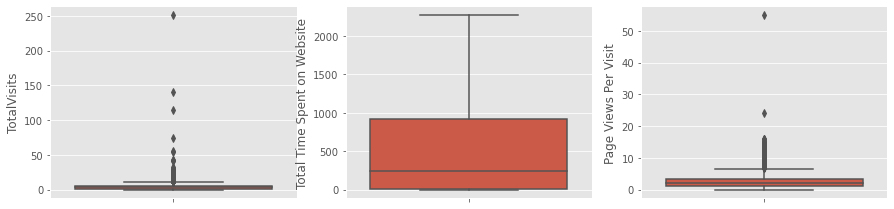

In [31]:
# Plotting the variables with outliers
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead)

Let's get rid of the higher outliers.

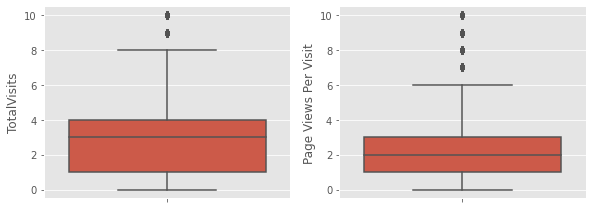

In [32]:
# Outlier treatment
Q = lead.TotalVisits.quantile(0.95)
lead = lead[(lead.TotalVisits <= Q)]
lead = lead[(lead['Page Views Per Visit'] <= Q)]

# Plotting the variables with outliers
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = lead)
plt.subplot(3,3,2)
sns.boxplot(y = 'Page Views Per Visit', data = lead)

In [33]:
# Data retained after imputations and other treatments
print(lead.shape)
print(round(100*(len(lead)/9240),2))

(8721, 25)
94.38


This is good enough and now we can go ahead with data visualization. 

In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               8721 non-null   object 
 1   Lead Source                               8721 non-null   object 
 2   Do Not Email                              8721 non-null   object 
 3   Do Not Call                               8721 non-null   object 
 4   Converted                                 8721 non-null   int64  
 5   TotalVisits                               8721 non-null   float64
 6   Total Time Spent on Website               8721 non-null   int64  
 7   Page Views Per Visit                      8721 non-null   float64
 8   Last Activity                             8721 non-null   object 
 9   Specialization                            8721 non-null   object 
 10  Search                              

### Step 3: Data Visualization and EDA

Let's start with the inspection of total cases that were 'Converted'

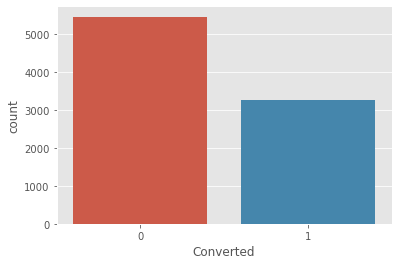

In [35]:
# Plotting 'Converted' count
plt.figure(figsize=(6,4))
sns.countplot(x = 'Converted', data = lead)

As we can see from the plot, the conversion rate is around 38%

Let's look at the numerical columns and do a bi-variate analysis w.r.t. 'Converted'

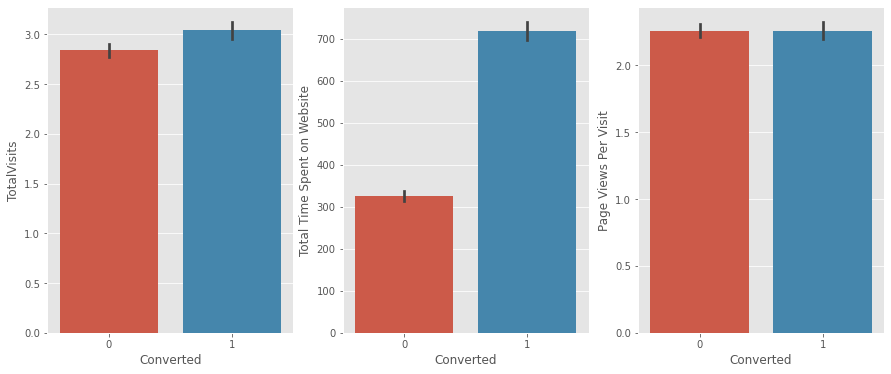

In [36]:
# Plotting various columns based on 'Converted' classifications
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = lead)
plt.subplot(1,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website', data = lead)
plt.subplot(1,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit', data = lead)

From the above plot we find that:

--> The more time spent on website, the more the conversion rate.

--> 'TotalVisits' and 'Page Views Per Visit' are significant for conversion rate even though there is a high probability        that conversion doesn't happen at all.

Now let's look at some categorical columns and do a bi-variate analysis w.r.t. 'Converted'

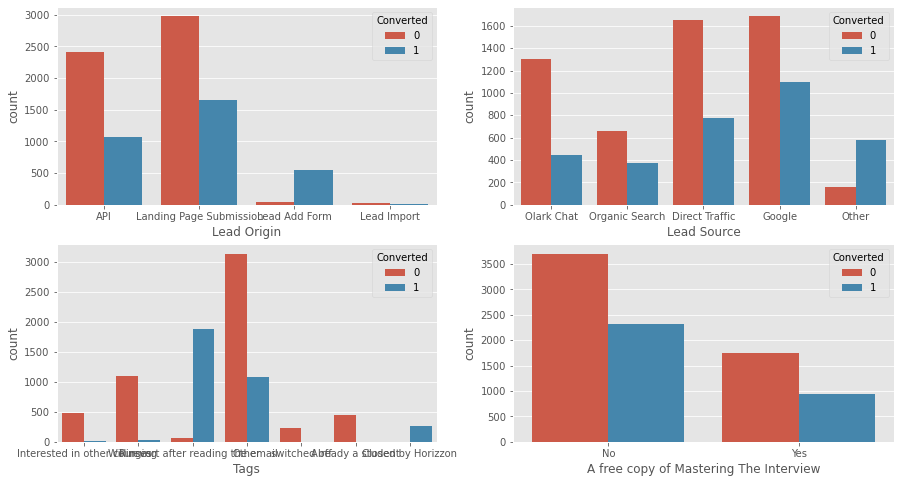

In [37]:
# Plotting various columns based on 'Converted' classifications
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Lead Origin', data = lead, hue = 'Converted')
plt.subplot(2,2,2)
sns.countplot(x = 'Lead Source', data = lead, hue = 'Converted')
plt.subplot(2,2,3)
sns.countplot(x = 'Tags', data = lead, hue = 'Converted')
plt.subplot(2,2,4)
sns.countplot(x = 'A free copy of Mastering The Interview', data = lead, hue = 'Converted')

1) 'Landing page submission' in 'Lead Origin' is responsible for most converts followed aby 'API'.

2) Most 'lead source' that get converted are from 'Google' search followed by 'Direct Traffic'.

3) People who revert after reading the email are most likely to get converted.

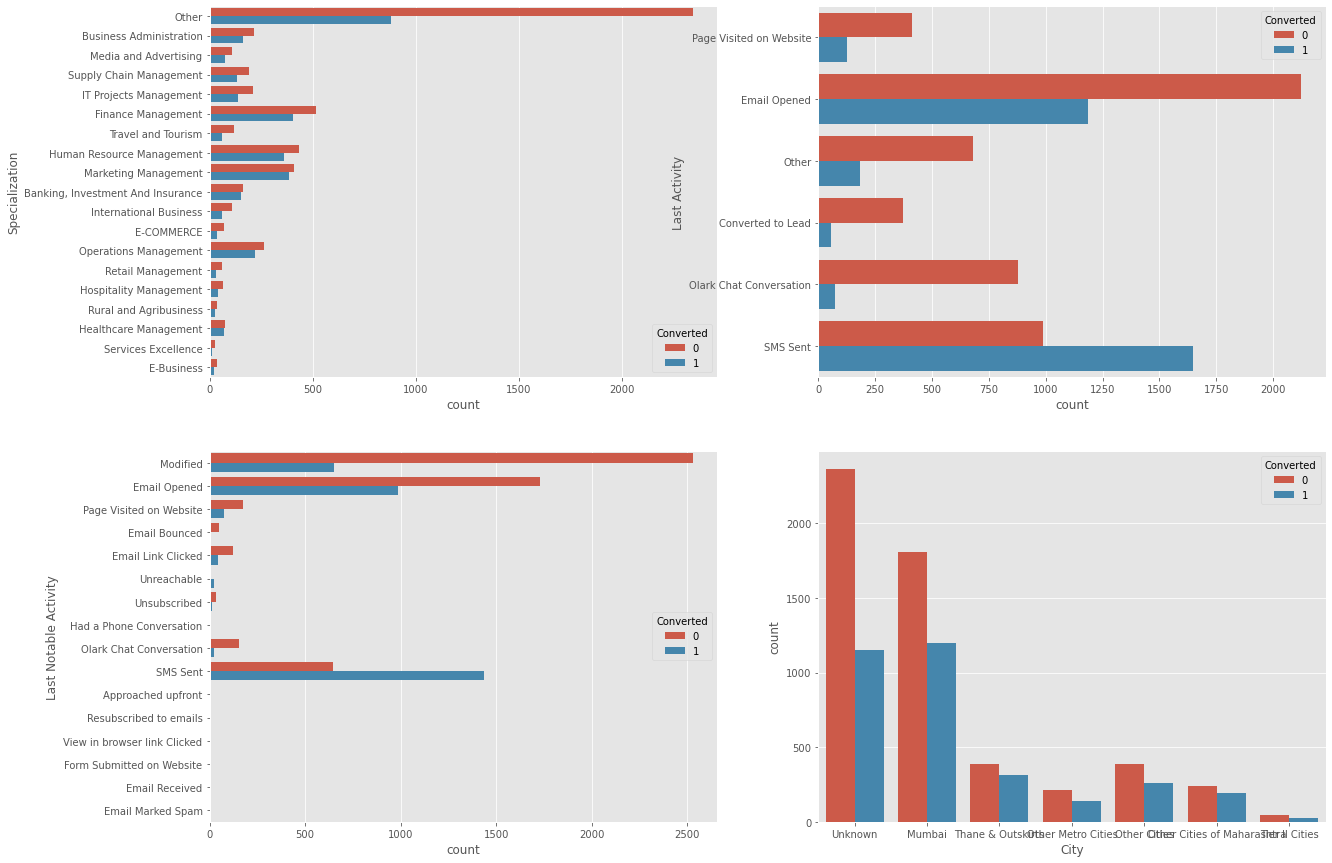

In [38]:
# Plotting various columns based on 'Converted' classifications
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(y = 'Specialization', data = lead, hue = 'Converted')
plt.subplot(2,2,2)
sns.countplot(y = 'Last Activity', data = lead, hue = 'Converted')
plt.subplot(2,2,3)
sns.countplot(y = 'Last Notable Activity', data = lead, hue = 'Converted')
plt.subplot(2,2,4)
sns.countplot(x = 'City', data = lead, hue = 'Converted')

1) Most people who get converted are from 'Finance', 'Human Resource', 'Marketing' and 'Operations' management specializations.

2) People who get converted to access email, sms and visit website frequently.

3) Mumbai seems to be the city which most people who get converted belong to.

There are some columns with either extremely skewed values or just one category. Let's look at these columns.

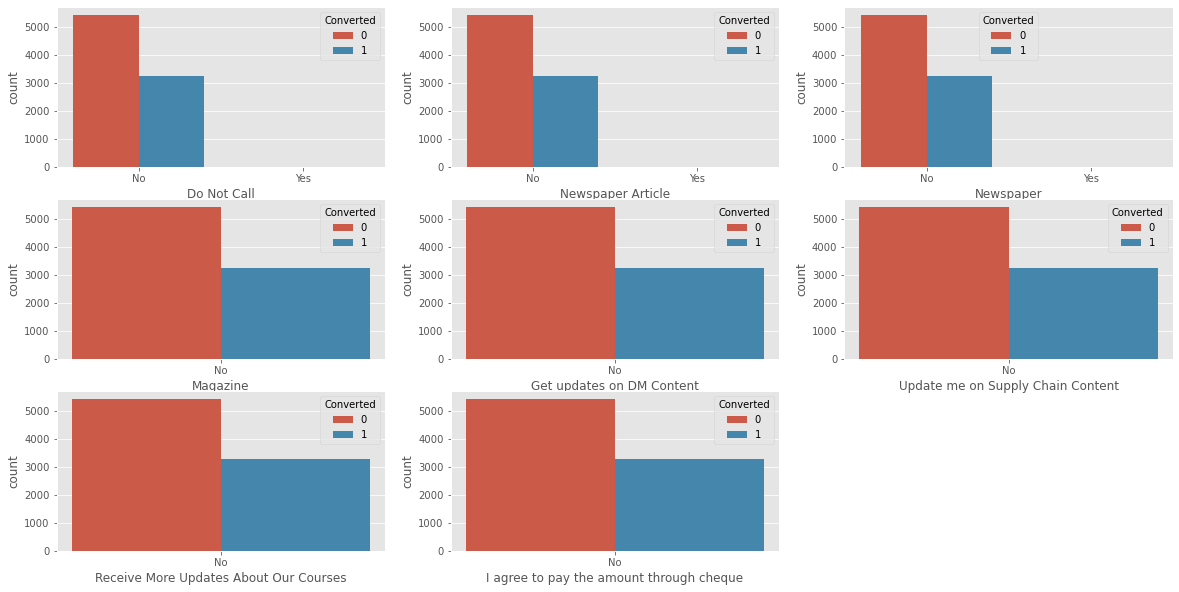

In [39]:
# Plotting columns having only single category/highly skewed columns
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.countplot(x = 'Do Not Call', data = lead, hue = 'Converted')
plt.subplot(3,3,2)
sns.countplot(x = 'Newspaper Article', data = lead, hue = 'Converted')
plt.subplot(3,3,3)
sns.countplot(x = 'Newspaper', data = lead, hue = 'Converted')
plt.subplot(3,3,4)
sns.countplot(x = 'Magazine', data = lead, hue = 'Converted')
plt.subplot(3,3,5)
sns.countplot(x = 'Get updates on DM Content', data = lead, hue = 'Converted')
plt.subplot(3,3,6)
sns.countplot(x = 'Update me on Supply Chain Content', data = lead, hue = 'Converted')
plt.subplot(3,3,7)
sns.countplot(x = 'Receive More Updates About Our Courses', data = lead, hue = 'Converted')
plt.subplot(3,3,8)
sns.countplot(x = 'I agree to pay the amount through cheque', data = lead, hue = 'Converted')

In [40]:
# Let's drop the these columns
lead = lead.drop(columns=['Do Not Call', 'Newspaper Article', 'Newspaper', 'Magazine','X Education Forums', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'I agree to pay the amount through cheque', 'Receive More Updates About Our Courses'])
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8721 non-null   object 
 1   Lead Source                             8721 non-null   object 
 2   Do Not Email                            8721 non-null   object 
 3   Converted                               8721 non-null   int64  
 4   TotalVisits                             8721 non-null   float64
 5   Total Time Spent on Website             8721 non-null   int64  
 6   Page Views Per Visit                    8721 non-null   float64
 7   Last Activity                           8721 non-null   object 
 8   Specialization                          8721 non-null   object 
 9   Search                                  8721 non-null   object 
 10  Digital Advertisement                   8721 non-null   obje

### Step 4: Data Preparation

**Conversion of binary variables from (Yes/No) to 0/1**

In [41]:
# Mapping list of variables
var_list =  ['Do Not Email', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[var_list] = lead[var_list].apply(binary_map)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,0,0,0,Interested in other courses,Unknown,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,0,0,0,Ringing,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other,Media and Advertising,0,0,0,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,0,0,0,Will revert after reading the email,Mumbai,0,Modified


**Dummy Variables**

In [42]:
# Creating dummy variables for categorical variables
dummy = pd.get_dummies(lead[['Lead Origin', 'Last Notable Activity']], drop_first=True)

# Adding the results to the dataframe
lead = pd.concat([lead, dummy], axis=1)
lead.shape

(8721, 34)

In [43]:
# Creating dummy variables for categorical variables with a category 'Other'/'Unknown' representing null/small percentages categories/select and dropping them

# 'Lead Source'
ls = pd.get_dummies(lead['Lead Source'], prefix='Lead Source')
# Dropping the level called 'Other' which represents null/select values
ls1 = ls.drop(['Lead Source_Other'], 1)
lead = pd.concat([lead,ls1], axis=1)

# 'Last Activity'
la = pd.get_dummies(lead['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Other' which represents null/select values
la1 = la.drop(['Last Activity_Other'], 1)
lead = pd.concat([lead,la1], axis=1)

# 'Specialization'
sp = pd.get_dummies(lead['Specialization'], prefix='Specialization')
# Dropping the level called 'Other' which represents null/select values
sp1 = sp.drop(['Specialization_Other'], 1)
lead = pd.concat([lead,sp1], axis=1)

# 'Tags'
tg = pd.get_dummies(lead['Tags'], prefix='Tags')
# Dropping the level called 'Other' which represents null/select values
tg1 = tg.drop(['Tags_Other'], 1)
lead = pd.concat([lead,tg1], axis=1)

# 'City'
ct = pd.get_dummies(lead['City'], prefix='City')
# Dropping the level called 'Other' which represents null/select values
ct1 = ct.drop(['City_Unknown'], 1)
lead = pd.concat([lead,ct1], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,0,...,1,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,0,...,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,0,...,0,0,1,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other,Media and Advertising,0,...,0,1,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,0,...,0,0,1,0,1,0,0,0,0,0


**Dropping the redundant variables**

In [44]:
# Dropping the original variables as we have created their dummies
lead = lead.drop(['Lead Origin', 'Last Notable Activity', 'Lead Source', 'Last Activity', 'Specialization', 'Tags', 'City'], axis = 1)
lead.shape

(8721, 66)

In [45]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


### Step 5: Test-Train Split

In [46]:
# Putting feature variable to x
x = lead.drop(['Converted'], axis=1)
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [47]:
# Putting response variable to y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [49]:
# Let's scale the numerical variables
scaler = StandardScaler()
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7220,0,0.436186,2.091938,0.918347,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
3383,0,0.028331,0.230687,0.391804,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
770,0,0.436186,-0.244329,0.918347,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5785,0,-1.195236,-0.876452,-1.187826,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5252,0,1.251898,-0.464278,-0.134740,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
# Checking the Lead Conversion Rate
convert = lead.Converted.sum()/len(lead.Converted.index) * 100
convert

37.495700034399725

**Before we proceed with the model building, let's look at the correlation matrix**

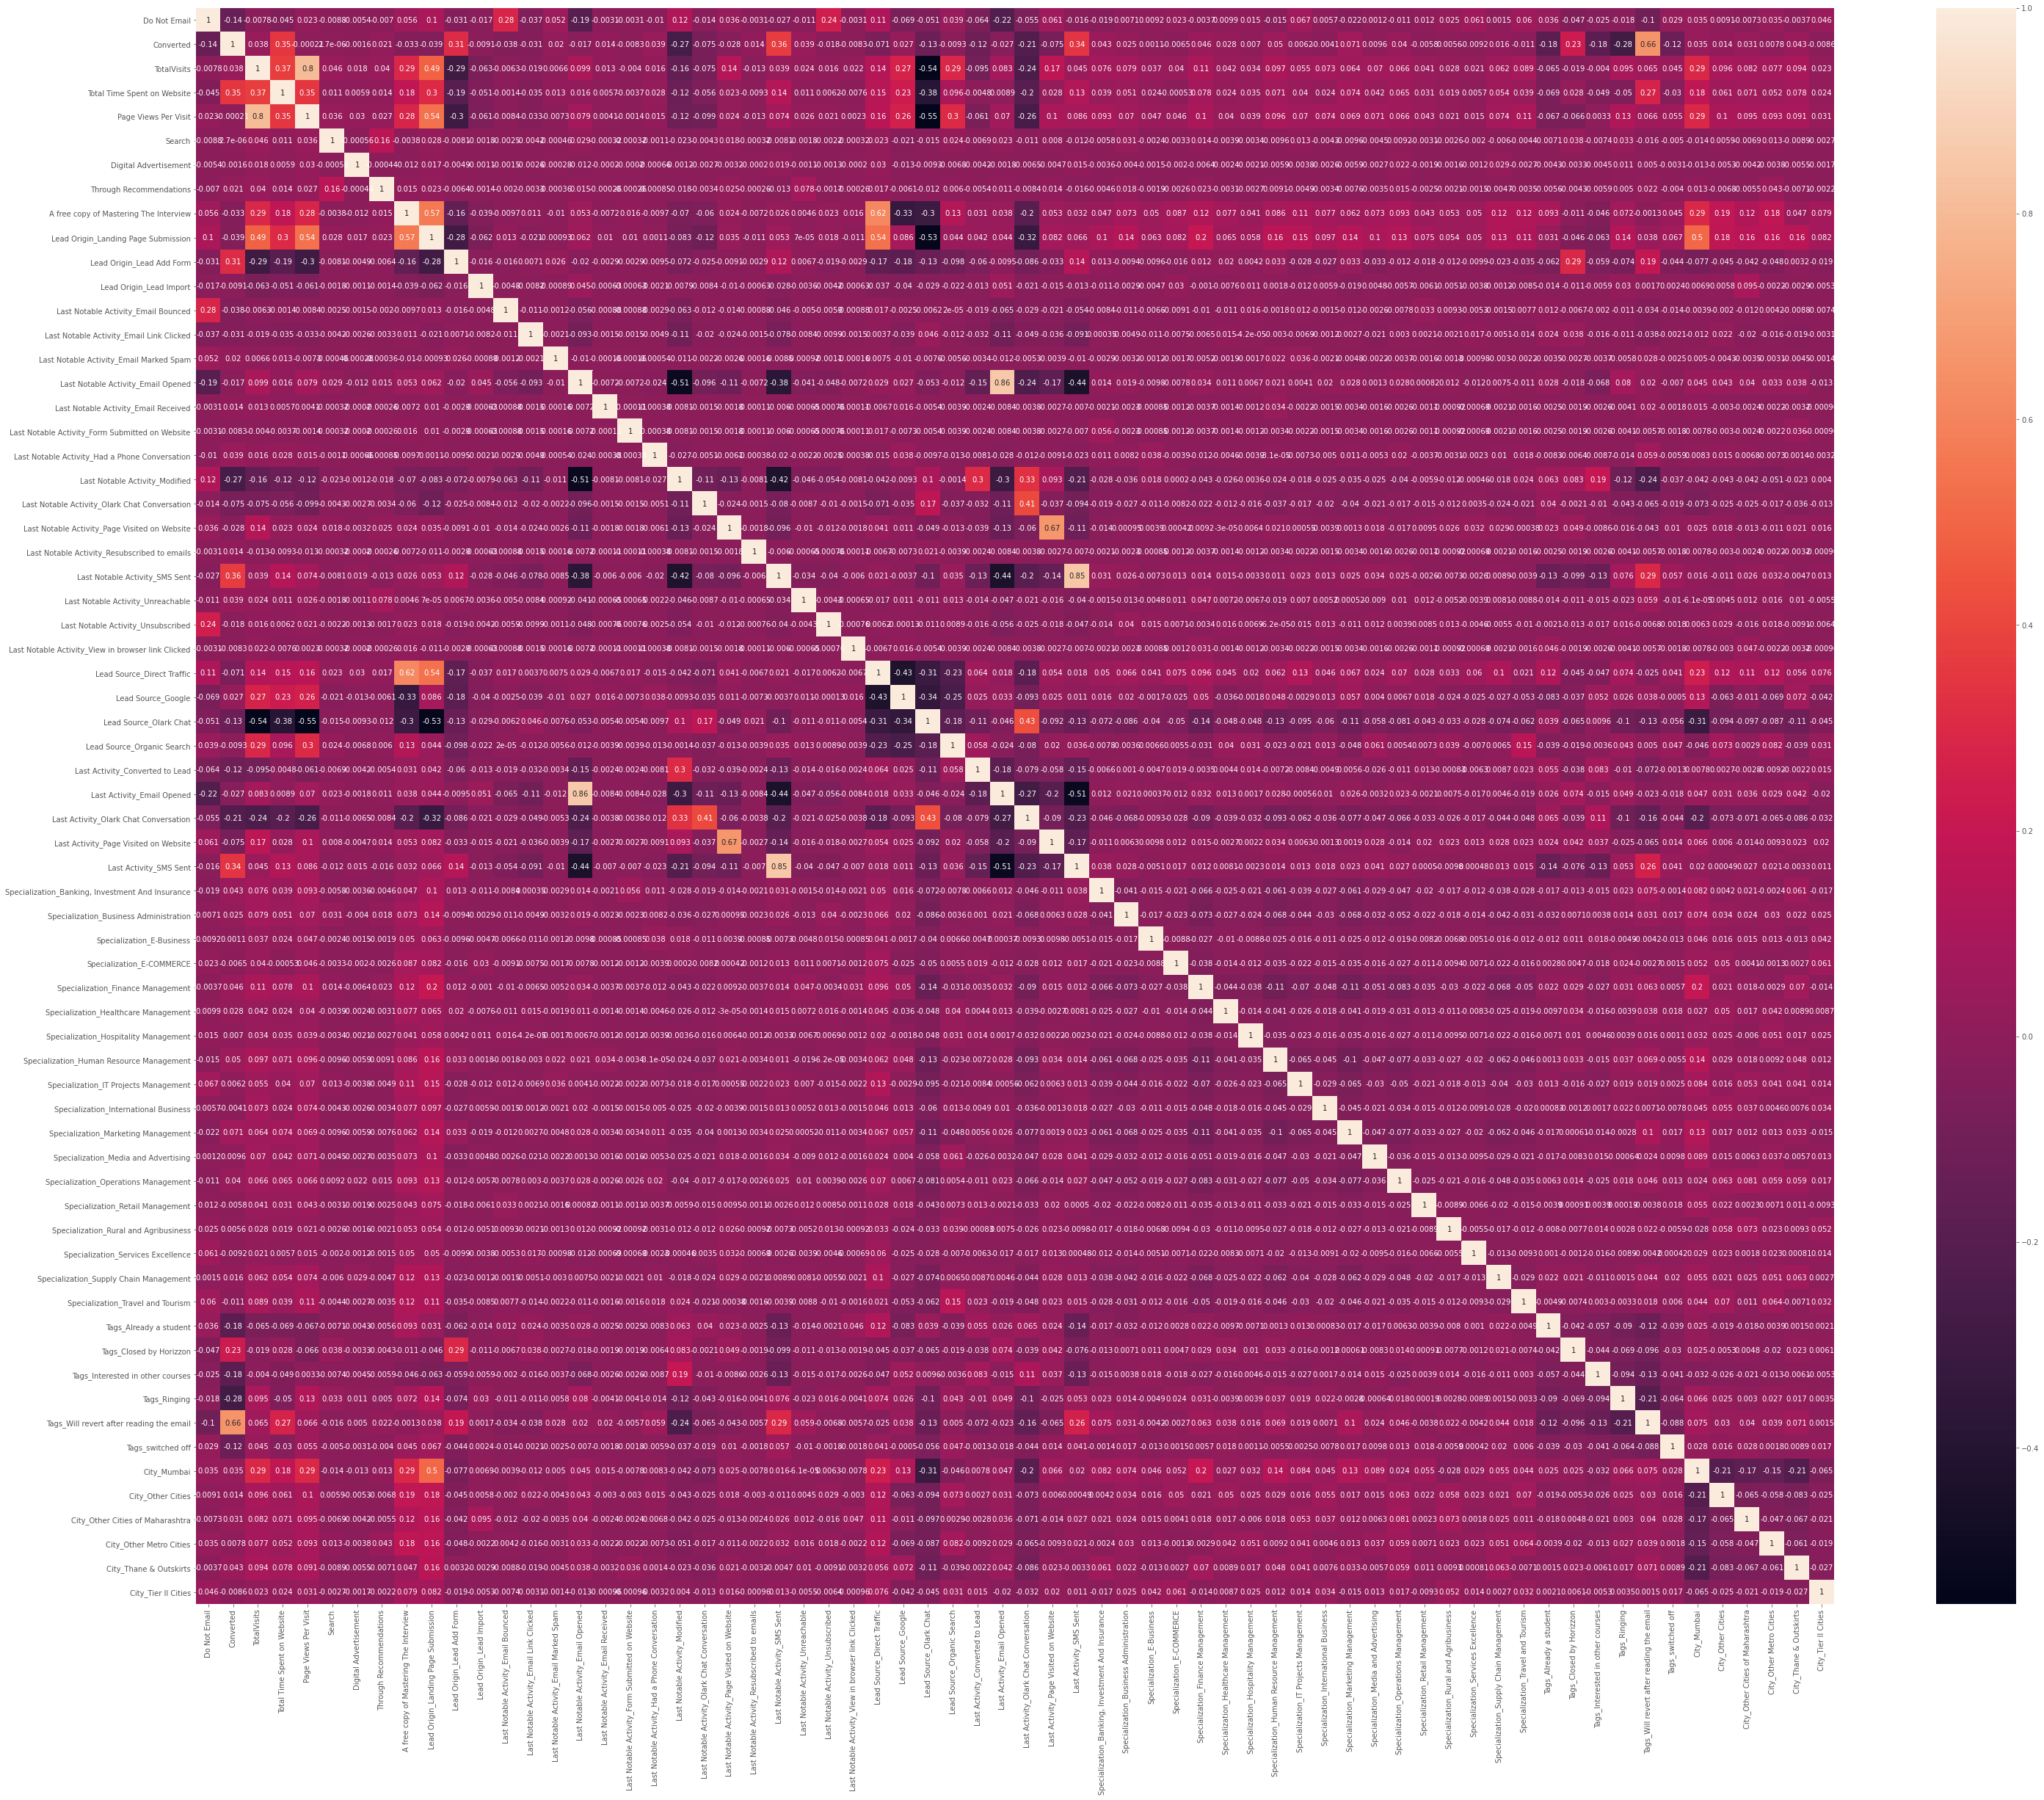

In [51]:
# Correlation matrix 
plt.figure(figsize = (50,40))
sns.heatmap(lead.corr(), annot = True)
plt.show()

### Step 7: Model Building

**Running first training model: statsmodel**

In [52]:
# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6104
Model Family:                Binomial   Df Model:                           -1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1322.4
Date:                Mon, 01 Jun 2020   Deviance:                       2644.9
Time:                        19:22:59   Pearson chi2:                 1.09e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 16.7460   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email                                          -1.7369      0.302     -5.749      0.000      -2.329      -1.145
TotalVisits                                            0.2609      0.086      3.018      0.003       0.091       0.430
Total Time Spent on Website                            1.0924      0.060     18.151      0.000       0.974       1.210
Page Views Per Visit                                  -0.3244      0.093     -3.496      0.000      -0.506      -0.143
Search                                                 0.9952      1.356      0.734      0.463      -1.662       3.653
Digital Advertisement                                 -1.4614      2.667     -0.548      0.584      -6.689       3.766
Through Recommendations                                3.6574      1.934      1.891      0.059      -0.134       7.448
A free copy of Mastering The Interview                 0.0274      0.177      0.155      0.877      -0.319       0.374
Lead Origin_Landing Page Submission                   -0.4776      0.236     -2.022      0.043      -0.940      -0.015
Lead Origin_Lead Add Form                              3.3237      0.527      6.307      0.000       2.291       4.357
Lead Origin_Lead Import                                0.2852      0.904      0.316      0.752      -1.486       2.056
Last Notable Activity_Email Bounced                  -16.9476   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Email Link Clicked             -18.4777   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Email Marked Spam                0.5076   5.87e+04   8.64e-06      1.000   -1.15e+05    1.15e+05
Last Notable Activity_Email Opened                   -18.4991   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Email Received                   0.9466   6.82e+04   1.39e-05      1.000   -1.34e+05    1.34e+05
Last Notable Activity_Form Submitted on Website      -38.1321   6.82e+04     -0.001      1.000   -1.34e+05    1.34e+05
Last Notable Activity_Had a Phone Conversation       -17.5310   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Modified                       -18.8647   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Olark Chat Conversation        -18.8567   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Page Visited on Website        -17.7478   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Last Notable Activity_Resubscribed to emails           5.8005   6.82e+04   8.51e-05      1.000   -1.34e+05  

**Feature Selection using RFE**

In [53]:
# Running RFE with the output number of variables as 15
lr = LogisticRegression()
rfe = RFE(lr, 15)
rfe = rfe.fit(x_train, y_train)

In [54]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True])

In [55]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Search', False, 16),
 ('Digital Advertisement', False, 28),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Last Notable Activity_Email Bounced', False, 12),
 ('Last Notable Activity_Email Link Clicked', False, 9),
 ('Last Notable Activity_Email Marked Spam', False, 45),
 ('Last Notable Activity_Email Opened', False, 10),
 ('Last Notable Activity_Email Received', False, 49),
 ('Last Notable Activity_Form Submitted on Website', False, 35),
 ('Last Notable Activity_Had a Phone Conversation', False, 40),
 ('Last Notable Activity_Modified', False, 3),
 ('Last Notable Activity_Olark Chat Conversation', False, 6),
 ('Last Notable Activity_Page Visited on Website', False, 4

In [56]:
col = x_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_SMS Sent', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'City_Tier II Cities'],
      dtype='object')

**Using StatsModels to assess the model**

In [57]:
x_train_sm = sm.add_constant(x_train[col])
lm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.2
Date:                Mon, 01 Jun 2020   Deviance:                       2744.3
Time:                        19:23:01   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8172      0.078    -23.161      0.000      -1.971      -1.663
Do Not Email                                -1.6268      0.238     -6.841      0.000      -2.093      -1.161
Total Time Spent on Website                  1.0667      0.057     18.681      0.000       0.955       1.179
Through Recommendations                      4.2824      2.097      2.042      0.041       0.172       8.393
Lead Origin_Lead Add Form                    3.7965      0.302     12.592      0.000       3.206       4.387
Last Notable Activity_SMS Sent               2.3173      0.125     18.513      0.000       2.072       2.563
Lead Source_Olark Chat                       1.3238      0.142      9.344      0.000       1.046       1.602
Last Activity_Olark Chat Conversation       -1.4106      0.206     -6.855      0.000      -1.814      -1.007
Specialization_Travel and Tourism           -0.9682      0.406     -2.384      0.017      -1.764      -0.172
Tags_Already a student                      -3.4798      0.720     -4.831      0.000      -4.892      -2.068
Tags_Closed by Horizzon                      6.2791      1.018      6.167      0.000       4.283       8.275
Tags_Interested in other courses            -2.2649      0.358     -6.327      0.000      -2.967      -1.563
Tags_Ringing                                -3.6029      0.250    -14.415      0.000      -4.093      -3.113
Tags_Will revert after reading the email     4.3815      0.184     23.750      0.000       4.020       4.743
Tags_switched off                           -4.1515      0.743     -5.591      0.000      -5.607      -2.696
City_Tier II Cities                         -1.1087      0.726     -1.528      0.126      -2.531       0.313
============================================================================================================
"""

In [58]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:5]

7220    0.991803
3383    0.678324
770     0.559559
5785    0.999566
5252    0.501187
dtype: float64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.99180309, 0.6783239 , 0.55955879, 0.99956645, 0.501187  ])

In [60]:
# Let's create a dataframe with the Convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['ConvertID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID
0,1,0.991803,7220
1,0,0.678324,3383
2,0,0.559559,770
3,1,0.999566,5785
4,1,0.501187,5252


In [61]:
# Let's create a column 'Predicted' with 1 and 0 based on Convert_Prob(1: >0.5 and 0: <0.5)
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.991803,7220,1
1,0,0.678324,3383,1
2,0,0.559559,770,1
3,1,0.999566,5785,1
4,1,0.501187,5252,1


In [62]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3634  175]
 [ 358 1937]]


In [63]:
# Predicted     Not_Convert    Convert
# Actual
# Not_Convert       3634          175
# Convert           358          1937  

In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.9126802096985583


**Checking VIF**

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,1.63
12,Tags_Will revert after reading the email,1.52
4,Last Notable Activity_SMS Sent,1.47
1,Total Time Spent on Website,1.41
6,Last Activity_Olark Chat Conversation,1.41
3,Lead Origin_Lead Add Form,1.40
9,Tags_Closed by Horizzon,1.15
11,Tags_Ringing,1.09
0,Do Not Email,1.05
8,Tags_Already a student,1.04


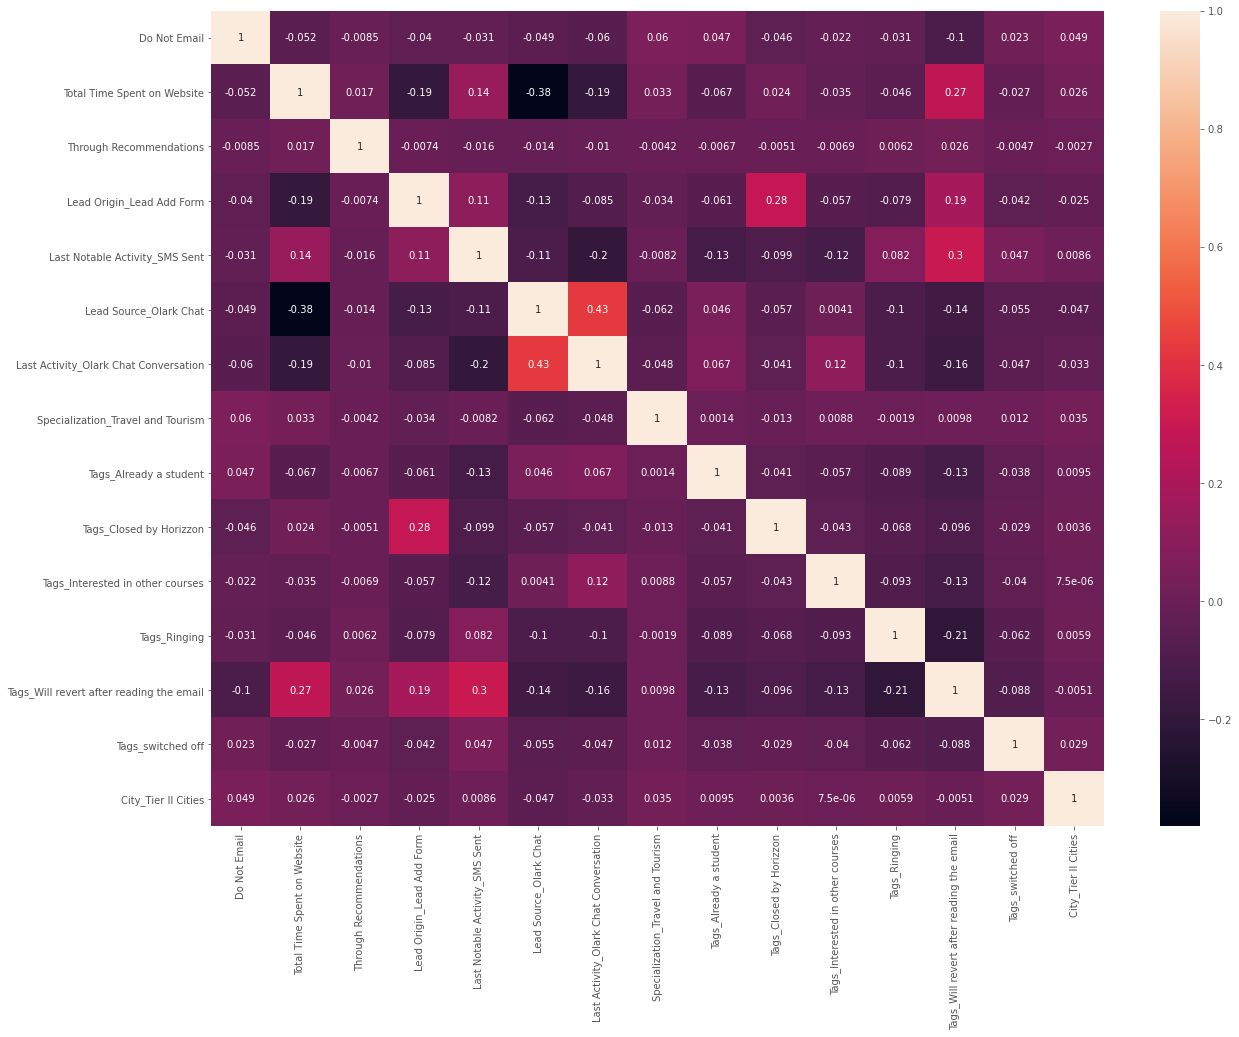

In [66]:
plt.figure(figsize = (20,15))
sns.heatmap(x_train[col].corr(), annot = True)
plt.show()

There are two significant multicollinear variables('Lead Source_Olark Chat' & 'Last Activity_Olark Chat Conversation') whose correlation coefficient make sense as these columns are redundant. Let's drop one of them.

In [67]:
# Let's drop 'Lead Source_Olark Chat'
col = col.drop('Lead Source_Olark Chat')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'City_Tier II Cities'],
      dtype='object')

In [68]:
x_train_sm = sm.add_constant(x_train[col])
lm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.3
Date:                Mon, 01 Jun 2020   Deviance:                       2832.5
Time:                        19:23:05   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4988      0.065    -22.985      0.000      -1.627      -1.371
Do Not Email                                -1.6988      0.232     -7.312      0.000      -2.154      -1.243
Total Time Spent on Website                  0.8354      0.049     17.002      0.000       0.739       0.932
Through Recommendations                      3.8455      2.096      1.835      0.067      -0.262       7.953
Lead Origin_Lead Add Form                    3.3091      0.294     11.247      0.000       2.732       3.886
Last Notable Activity_SMS Sent               2.3238      0.123     18.877      0.000       2.083       2.565
Last Activity_Olark Chat Conversation       -0.8926      0.201     -4.452      0.000      -1.286      -0.500
Specialization_Travel and Tourism           -1.1065      0.391     -2.832      0.005      -1.872      -0.341
Tags_Already a student                      -3.4220      0.716     -4.777      0.000      -4.826      -2.018
Tags_Closed by Horizzon                      6.1502      1.014      6.066      0.000       4.163       8.137
Tags_Interested in other courses            -2.2680      0.351     -6.455      0.000      -2.957      -1.579
Tags_Ringing                                -3.6473      0.247    -14.796      0.000      -4.130      -3.164
Tags_Will revert after reading the email     4.2585      0.181     23.507      0.000       3.903       4.614
Tags_switched off                           -4.2032      0.729     -5.767      0.000      -5.632      -2.775
City_Tier II Cities                         -1.3014      0.707     -1.840      0.066      -2.688       0.085
============================================================================================================
"""

In [69]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [70]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.989092,7220,1
1,0,0.734531,3383,1
2,0,0.650422,770,1
3,1,0.999529,5785,1
4,1,0.607579,5252,1


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.9112057667103539


In [73]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.48
4,Last Notable Activity_SMS Sent,1.44
3,Lead Origin_Lead Add Form,1.36
1,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.14
5,Last Activity_Olark Chat Conversation,1.10
10,Tags_Ringing,1.09
0,Do Not Email,1.05
9,Tags_Interested in other courses,1.04
7,Tags_Already a student,1.03


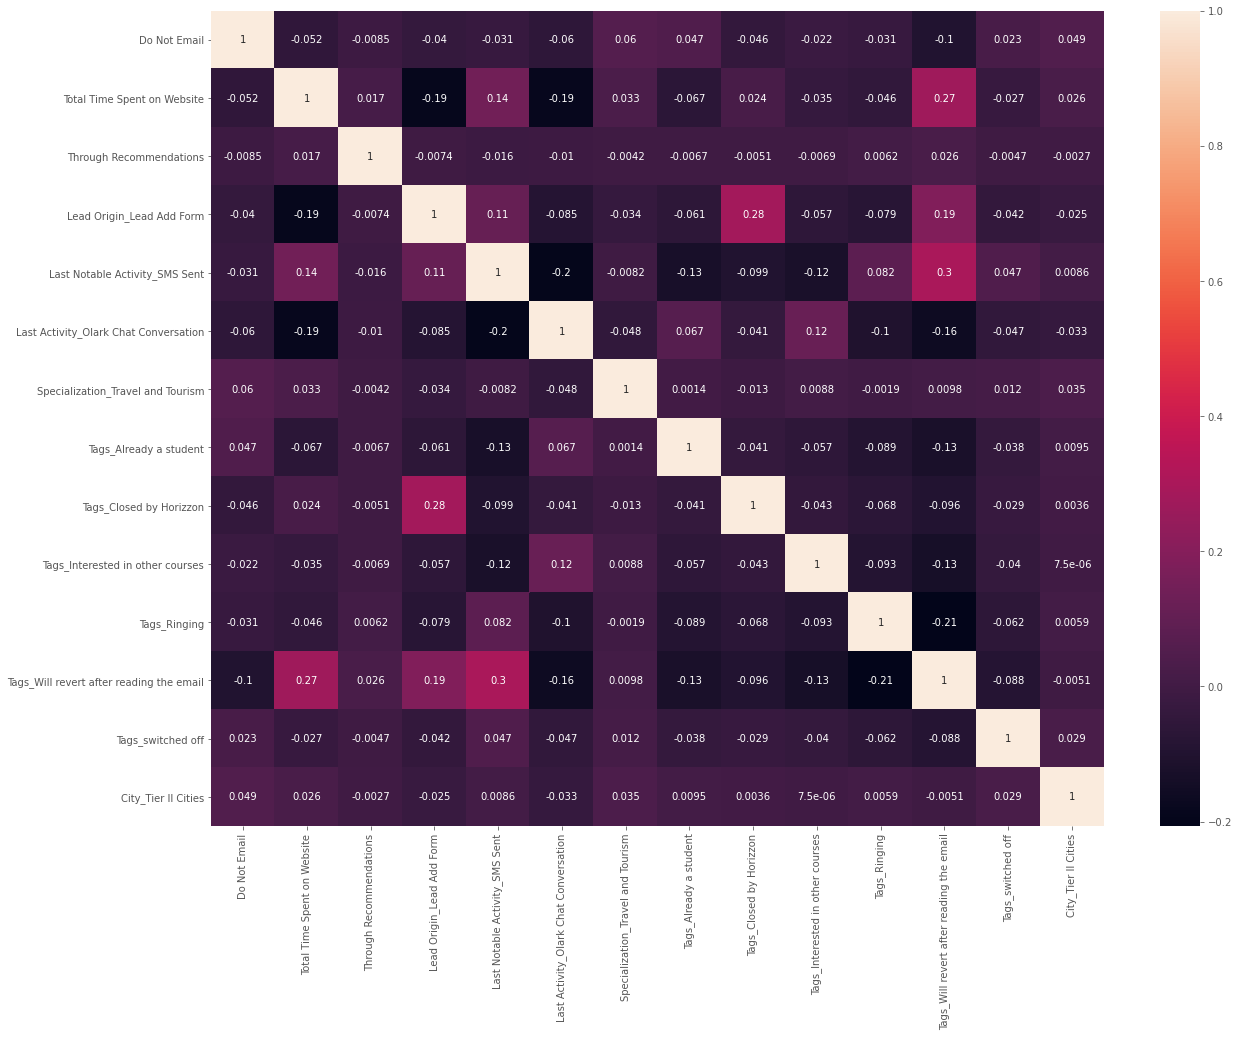

In [74]:
plt.figure(figsize = (20,15))
sns.heatmap(x_train[col].corr(), annot = True)
plt.show()

Let's look at two more variables('Tags_Will revert after reading the email', 'Last Notable Activity_SMS Sent'). They are multicolinear as their correlation coefficient is 0.3. Let's drop 'Tags_Will revert after reading the email'.

In [75]:
# Let's drop 'Tags_Will revert after reading the email'
col = col.drop('Tags_Will revert after reading the email')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_switched off', 'City_Tier II Cities'],
      dtype='object')

In [76]:
x_train_sm = sm.add_constant(x_train[col])
lm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Mon, 01 Jun 2020   Deviance:                       4046.2
Time:                        19:23:07   Pearson chi2:                 8.97e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5977      0.048    -12.425      0.000      -0.692      -0.503
Do Not Email                             -1.8779      0.179    -10.500      0.000      -2.228      -1.527
Total Time Spent on Website               0.9906      0.042     23.673      0.000       0.909       1.073
Through Recommendations                   3.8156      2.344      1.628      0.104      -0.778       8.409
Lead Origin_Lead Add Form                 3.8148      0.270     14.104      0.000       3.285       4.345
Last Notable Activity_SMS Sent            2.3796      0.106     22.346      0.000       2.171       2.588
Last Activity_Olark Chat Conversation    -1.2624      0.168     -7.505      0.000      -1.592      -0.933
Specialization_Travel and Tourism        -0.5439      0.275     -1.977      0.048      -1.083      -0.005
Tags_Already a student                   -4.4377      0.718     -6.183      0.000      -5.844      -3.031
Tags_Closed by Horizzon                   5.2809      1.017      5.194      0.000       3.288       7.274
Tags_Interested in other courses         -3.3024      0.357     -9.241      0.000      -4.003      -2.602
Tags_Ringing                             -4.7363      0.248    -19.098      0.000      -5.222      -4.250
Tags_switched off                        -5.2314      0.730     -7.167      0.000      -6.662      -3.801
City_Tier II Cities                      -0.5046      0.464     -1.088      0.277      -1.414       0.405
=========================================================================================================
"""

In [77]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [78]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.813755,7220,1
1,0,0.881887,3383,1
2,0,0.823445,770,1
3,1,0.991238,5785,1
4,1,0.789511,5252,1


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.8689384010484927


In [81]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,1.25
4,Last Notable Activity_SMS Sent,1.20
1,Total Time Spent on Website,1.13
8,Tags_Closed by Horizzon,1.13
5,Last Activity_Olark Chat Conversation,1.09
10,Tags_Ringing,1.08
0,Do Not Email,1.05
9,Tags_Interested in other courses,1.04
7,Tags_Already a student,1.03
6,Specialization_Travel and Tourism,1.02


In [82]:
# Let's drop 'City_Tier II Cities' with p-value of 0.277
col = col.drop('City_Tier II Cities')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_switched off'],
      dtype='object')

In [83]:
x_train_sm = sm.add_constant(x_train[col])
lm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6091
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.7
Date:                Mon, 01 Jun 2020   Deviance:                       4047.4
Time:                        19:23:08   Pearson chi2:                 9.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6010      0.048    -12.516      0.000      -0.695      -0.507
Do Not Email                             -1.8874      0.179    -10.573      0.000      -2.237      -1.538
Total Time Spent on Website               0.9904      0.042     23.670      0.000       0.908       1.072
Through Recommendations                   3.8192      2.344      1.629      0.103      -0.775       8.413
Lead Origin_Lead Add Form                 3.8195      0.271     14.118      0.000       3.289       4.350
Last Notable Activity_SMS Sent            2.3790      0.106     22.349      0.000       2.170       2.588
Last Activity_Olark Chat Conversation    -1.2589      0.168     -7.486      0.000      -1.589      -0.929
Specialization_Travel and Tourism        -0.5550      0.274     -2.027      0.043      -1.092      -0.018
Tags_Already a student                   -4.4502      0.718     -6.200      0.000      -5.857      -3.043
Tags_Closed by Horizzon                   5.2824      1.017      5.194      0.000       3.289       7.276
Tags_Interested in other courses         -3.3065      0.357     -9.257      0.000      -4.006      -2.606
Tags_Ringing                             -4.7371      0.248    -19.106      0.000      -5.223      -4.251
Tags_switched off                        -5.2342      0.730     -7.173      0.000      -6.664      -3.804
=========================================================================================================
"""

In [84]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [85]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.813204,7220,1
1,0,0.881483,3383,1
2,0,0.822893,770,1
3,1,0.991246,5785,1
4,1,0.788887,5252,1


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.8691022280471822


In [88]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,1.25
4,Last Notable Activity_SMS Sent,1.20
1,Total Time Spent on Website,1.13
8,Tags_Closed by Horizzon,1.13
5,Last Activity_Olark Chat Conversation,1.09
10,Tags_Ringing,1.08
0,Do Not Email,1.04
9,Tags_Interested in other courses,1.04
7,Tags_Already a student,1.03
6,Specialization_Travel and Tourism,1.02


In [89]:
# Let's drop 'Through Recommendations' with p-value of 0.103
col = col.drop('Through Recommendations')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_switched off'],
      dtype='object')

In [90]:
x_train_sm = sm.add_constant(x_train[col])
lm6 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6092
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.2
Date:                Mon, 01 Jun 2020   Deviance:                       4052.3
Time:                        19:23:09   Pearson chi2:                 8.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5972      0.048    -12.453      0.000      -0.691      -0.503
Do Not Email                             -1.8897      0.178    -10.588      0.000      -2.240      -1.540
Total Time Spent on Website               0.9910      0.042     23.699      0.000       0.909       1.073
Lead Origin_Lead Add Form                 3.8169      0.271     14.110      0.000       3.287       4.347
Last Notable Activity_SMS Sent            2.3752      0.106     22.317      0.000       2.167       2.584
Last Activity_Olark Chat Conversation    -1.2626      0.168     -7.507      0.000      -1.592      -0.933
Specialization_Travel and Tourism        -0.5577      0.274     -2.037      0.042      -1.094      -0.021
Tags_Already a student                   -4.4543      0.718     -6.205      0.000      -5.861      -3.047
Tags_Closed by Horizzon                   5.2797      1.017      5.192      0.000       3.286       7.273
Tags_Interested in other courses         -3.3097      0.357     -9.267      0.000      -4.010      -2.610
Tags_Ringing                             -4.7327      0.248    -19.097      0.000      -5.218      -4.247
Tags_switched off                        -5.2350      0.730     -7.174      0.000      -6.665      -3.805
=========================================================================================================
"""

In [91]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [92]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [93]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.813961,7220,1
1,0,0.881487,3383,1
2,0,0.822858,770,1
3,1,0.991219,5785,1
4,1,0.788825,5252,1


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.8689384010484927


In [95]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.25
3,Last Notable Activity_SMS Sent,1.20
1,Total Time Spent on Website,1.13
7,Tags_Closed by Horizzon,1.13
4,Last Activity_Olark Chat Conversation,1.09
9,Tags_Ringing,1.08
0,Do Not Email,1.04
8,Tags_Interested in other courses,1.04
6,Tags_Already a student,1.03
5,Specialization_Travel and Tourism,1.02


In [96]:
# Let's drop 'Specialization_Travel and Tourism' as this is not very useful for the model
col = col.drop('Specialization_Travel and Tourism')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_switched off'],
      dtype='object')

In [97]:
x_train_sm = sm.add_constant(x_train[col])
lm7 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6093
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.3
Date:                Mon, 01 Jun 2020   Deviance:                       4056.5
Time:                        19:23:09   Pearson chi2:                 8.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6090      0.048    -12.785      0.000      -0.702      -0.516
Do Not Email                             -1.9004      0.178    -10.668      0.000      -2.250      -1.551
Total Time Spent on Website               0.9876      0.042     23.669      0.000       0.906       1.069
Lead Origin_Lead Add Form                 3.8259      0.270     14.148      0.000       3.296       4.356
Last Notable Activity_SMS Sent            2.3711      0.106     22.302      0.000       2.163       2.580
Last Activity_Olark Chat Conversation    -1.2510      0.168     -7.446      0.000      -1.580      -0.922
Tags_Already a student                   -4.4452      0.718     -6.194      0.000      -5.852      -3.039
Tags_Closed by Horizzon                   5.2744      1.017      5.186      0.000       3.281       7.268
Tags_Interested in other courses         -3.3075      0.357     -9.275      0.000      -4.006      -2.609
Tags_Ringing                             -4.7194      0.247    -19.069      0.000      -5.205      -4.234
Tags_switched off                        -5.2242      0.729     -7.163      0.000      -6.654      -3.795
=========================================================================================================
"""

In [98]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [99]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [100]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted
0,1,0.811070,7220,1
1,0,0.879735,3383,1
2,0,0.820655,770,1
3,1,0.991185,5785,1
4,1,0.786435,5252,1


In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.8682830930537353


In [102]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.25
3,Last Notable Activity_SMS Sent,1.20
1,Total Time Spent on Website,1.13
6,Tags_Closed by Horizzon,1.13
4,Last Activity_Olark Chat Conversation,1.09
8,Tags_Ringing,1.08
0,Do Not Email,1.04
7,Tags_Interested in other courses,1.04
5,Tags_Already a student,1.03
9,Tags_switched off,1.02


**Various metrics**

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8440087145969499

In [105]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.9540561827251247

In [106]:
# False postive rate - predicting convert when customer hasn't
print(FP/ float(TN+FP))

0.045943817274875294


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9171401515151515


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9103206412825652


### Step 8: Plotting the ROC curve

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

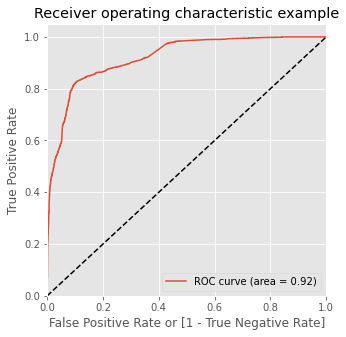

In [111]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

The curve looks good here with a significant amount of area.  

### Step 9: Finding Optimal Cutoff Point

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.811070,7220,1,1,1,1,1,1,1,1,1,1,0
1,0,0.879735,3383,1,1,1,1,1,1,1,1,1,1,0
2,0,0.820655,770,1,1,1,1,1,1,1,1,1,1,0
3,1,0.991185,5785,1,1,1,1,1,1,1,1,1,1,1
4,1,0.786435,5252,1,1,1,1,1,1,1,1,1,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375983  1.000000  0.000000
0.1   0.1  0.712320  0.979085  0.551588
0.2   0.2  0.760157  0.909804  0.669992
0.3   0.3  0.842890  0.854031  0.836177
0.4   0.4  0.869758  0.824401  0.897086
0.5   0.5  0.868283  0.794336  0.912838
0.6   0.6  0.853702  0.734641  0.925440
0.7   0.7  0.837975  0.664052  0.942767
0.8   0.8  0.795872  0.495861  0.976634
0.9   0.9  0.773100  0.411765  0.990811


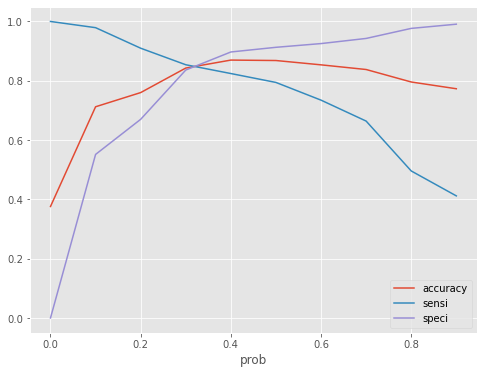

In [114]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,6))
plt.show()

**From the plot, the optimal cutoff of 0.32 can be taken here**

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,ConvertID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.811070,7220,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.879735,3383,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.820655,770,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.991185,5785,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.786435,5252,1,1,1,1,1,1,1,1,1,0,0,1


In [116]:
# lead Score calculation
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Convert,Convert_Prob,ConvertID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.811070,7220,1,1,1,1,1,1,1,1,1,1,0,1,81
1,0,0.879735,3383,1,1,1,1,1,1,1,1,1,1,0,1,88
2,0,0.820655,770,1,1,1,1,1,1,1,1,1,1,0,1,82
3,1,0.991185,5785,1,1,1,1,1,1,1,1,1,1,1,1,99
4,1,0.786435,5252,1,1,1,1,1,1,1,1,1,0,0,1,79
5,0,0.003454,9123,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0.308504,226,0,1,1,1,1,0,0,0,0,0,0,0,31
7,0,0.003531,6352,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0.012209,653,0,1,0,0,0,0,0,0,0,0,0,0,1
9,1,0.980774,2010,1,1,1,1,1,1,1,1,1,1,1,1,98


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.85370249017038

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3265,  544],
       [ 349, 1946]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8479302832244009

In [121]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.8571803622998162

In [122]:
# False postive rate - predicting convert when customer hasn't
print(FP/ float(TN+FP))

0.14281963770018377


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7815261044176707


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9034311012728279


**Precision and Recall**

In [125]:
# Precision(TP / TP + FP)
p = confusion[1,1]/(confusion[0,1]+confusion[1,1])
p

0.9171401515151515

In [126]:
# Recall(TP / TP + FN)
r = confusion[1,1]/(confusion[1,0]+confusion[1,1])
r

0.8440087145969499

In [127]:
# Precision Score
precision_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.8459396751740139

In [128]:
# Recall Score
recall_score(y_train_pred_final.Convert, y_train_pred_final.Predicted)

0.7943355119825708

In [129]:
# F1 Score
2*(p*r)/(p+r)

0.8790560471976401

**Precision and Recall tradeoff**

In [130]:
y_train_pred_final.Convert, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6099    0
 6100    0
 6101    0
 6102    0
 6103    1
 Name: Convert, Length: 6104, dtype: int64, 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 6099    0
 6100    0
 6101    0
 6102    0
 6103    1
 Name: Predicted, Length: 6104, dtype: int64)

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

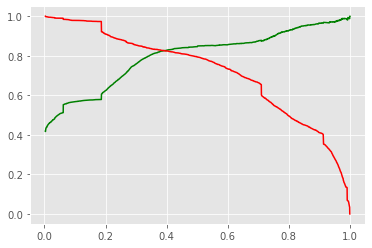

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**According to the curve above, the threshold is around 0.38. However, from the previous cutoff value of 0.32 we were able to achieve desired conversion rate of more than 80%. Hence, we'll stick to 0.32.** 

### Step 10: Making predictions on the test set

In [133]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [134]:
x_test = x_test[col]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Notable Activity_SMS Sent,Last Activity_Olark Chat Conversation,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_switched off
1105,0,-0.602901,0,0,0,0,0,0,0,0
5872,0,-0.876452,1,1,0,0,0,0,0,0
480,0,-0.876452,0,0,0,0,0,0,0,0
8055,0,-0.876452,1,1,0,0,0,0,0,0
8214,0,-0.876452,0,0,0,0,0,0,0,0


In [135]:
x_test_sm = sm.add_constant(x_test)

In [136]:
# Let's make predictions on the test set
y_test_pred = res.predict(x_test_sm)

In [137]:
y_test_pred[:5]

1105    0.230683
5872    0.991185
480     0.186241
8055    0.991185
8214    0.186241
dtype: float64

In [138]:
# Converting y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting ConvertID to index
y_test_df['ConvertID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,ConvertID,0
0,0,1105,0.230683
1,1,5872,0.991185
2,0,480,0.186241
3,1,8055,0.991185
4,0,8214,0.186241


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [145]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Converted,ConvertID,Convert_Prob,final_predicted
0,0,1105,0.230683,0
1,1,5872,0.991185,1
2,0,480,0.186241,0
3,1,8055,0.991185,1
4,0,8214,0.186241,0


**Let's also calculate the Lead Score**

In [146]:
# lead score calculation
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,ConvertID,Convert_Prob,final_predicted,Lead_Score
0,0,1105,0.230683,0,23
1,1,5872,0.991185,1,99
2,0,480,0.186241,0,19
3,1,8055,0.991185,1,99
4,0,8214,0.186241,0,19
5,0,4641,0.010156,0,1
6,0,5693,0.186241,0,19
7,1,3810,0.763545,1,76
8,1,430,0.260061,0,26
9,1,2085,0.913038,1,91


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8589988536492167

In [148]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1407,  235],
       [ 134,  841]], dtype=int64)

In [149]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [150]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8625641025641025

In [151]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.8568818514007308

In [152]:
# Calculate false postive rate - predicting convert when customer hasn't
print(FP/ float(TN+FP))

0.1431181485992692


In [153]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7815985130111525


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9130434782608695


In [155]:
# Precision(TP / TP + FP)
p = confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])
p

0.7815985130111525

In [156]:
# Recall(TP / TP + FN)
r = confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])
r

0.8625641025641025

In [157]:
# Precision Score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7815985130111525

In [158]:
# Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8625641025641025

In [159]:
# F1 Score
2*(p*r)/(p+r)

0.8200877620672844

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Convert_Prob, drop_intermediate = False )

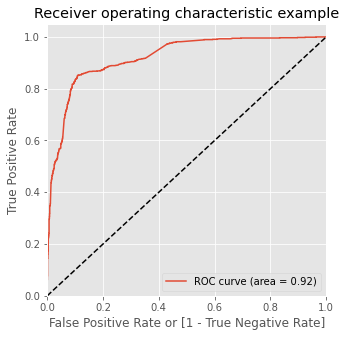

In [162]:
draw_roc(y_pred_final.Converted, y_pred_final.Convert_Prob)

The curve and area under it looks good and similar to that of train-set.

In [163]:
# Let's check the % of correctly predicted conversion 
cor_pred = y_pred_final.loc[y_pred_final['Converted']==1,['final_predicted']]
cor_pred['final_predicted'].sum()/y_pred_final['Converted'].sum() * 100

86.25641025641025

### Conclusion

**Based on the model the features that are most contributing towards the leads getting converted are:**

**Features with Positive Coefficients**

1) Tags_Closed by Horizzon		

2) Lead Origin_Lead Add Form	

3) Last Notable Activity_SMS Sent	

4) Total Time Spent on Website	

**Features with Negative Coefficients**

1) Tags_switched off	

2) Tags_Ringing	

3) Tags_Already a student	

4) Tags_Interested in other courses	

5) Do Not Email	

6) Last Activity_Olark Chat Conversation	

**The metrics for the test-set looks good**

Accuracy: 87%

Sensitivity: 84%

Specificity: 85%

Conversion rate: 84%